# Project Group - 23

Members and student numbers: 

Benjamin van Burik - 4992784

Féron van Hoeven - 4890493

Harald Rensink - 5839767

Willem van Rootselaar - 4686594

Mike Schagen - 4482344

# Research Objective

*Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*

### Main research question
How is the congestion around Delft impacted by the impact of rising gas prices?

To find a relation between the two events we are looking into the gas prices in the period of march 2020 until september 2022. The reason for this time span are the major global events that occured during this period (like COVID-19, wars, etc.). Other than that we tried to picture the amount of congestion in this period. And finally, we took a look at the COVID-19 infections over this period and tried to find a link between the infections and the congestion and gas prices.

# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Author 1**:
Benjamin van Burik: Coding COVID-visualisation, researching data and analysing data for the report.

**Author 2**:
Féron van Hoeven: Script for combining multiple .csv files for the congestion data analysis.
Script congestion data analysis.

**Author 3**:
Harald Rensink

**Author 4**:
Willem van Rootselaar

**Author 5**:
Mike Schagen: Coding gas prices

# Data Used

**Rijkswaterstaat**: Filedata 01-03-2020 to 30-09-2022 https://downloads.rijkswaterstaatdata.nl/filedata/

**CBS**: Pompprijzen

**CBS**: COVID-19 Besmettingen https://data.rivm.nl/covid-19/

# Data Pipeline

**GitHub repository link**:https://github.com/benjaminvburik/TIL6022---Project.git

In [1]:
import os
import glob
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.dates as mdates
import datetime
import plotly.express as px
import seaborn as sns

# Gas prices

In [2]:
#Load file of petrol prices
file = 'data/Pompprijzen2006-heden.csv'
pompprijzen = pd.read_csv(file, delimiter = ';')

In [3]:
#test code to change date output string of date
now = '20220823'
datetime_object = datetime.datetime.strptime(now, '%Y%m%d')
now_better = datetime_object.strftime('%d/%m/%Y')
print(now_better)

23/08/2022


In [4]:
#process data to get our chosen timeline, make list of dates of chosen timeline and set index to date
pompprijzen_timeline = pompprijzen[
    pompprijzen.Perioden > 20200229 
]

start = datetime.datetime.strptime('01/03/2020', '%d/%m/%Y')
dates_rough = [start + datetime.timedelta(days=x) for x in range(0, 940)]

pompprijzen_timeline.set_index('Perioden', inplace = True)

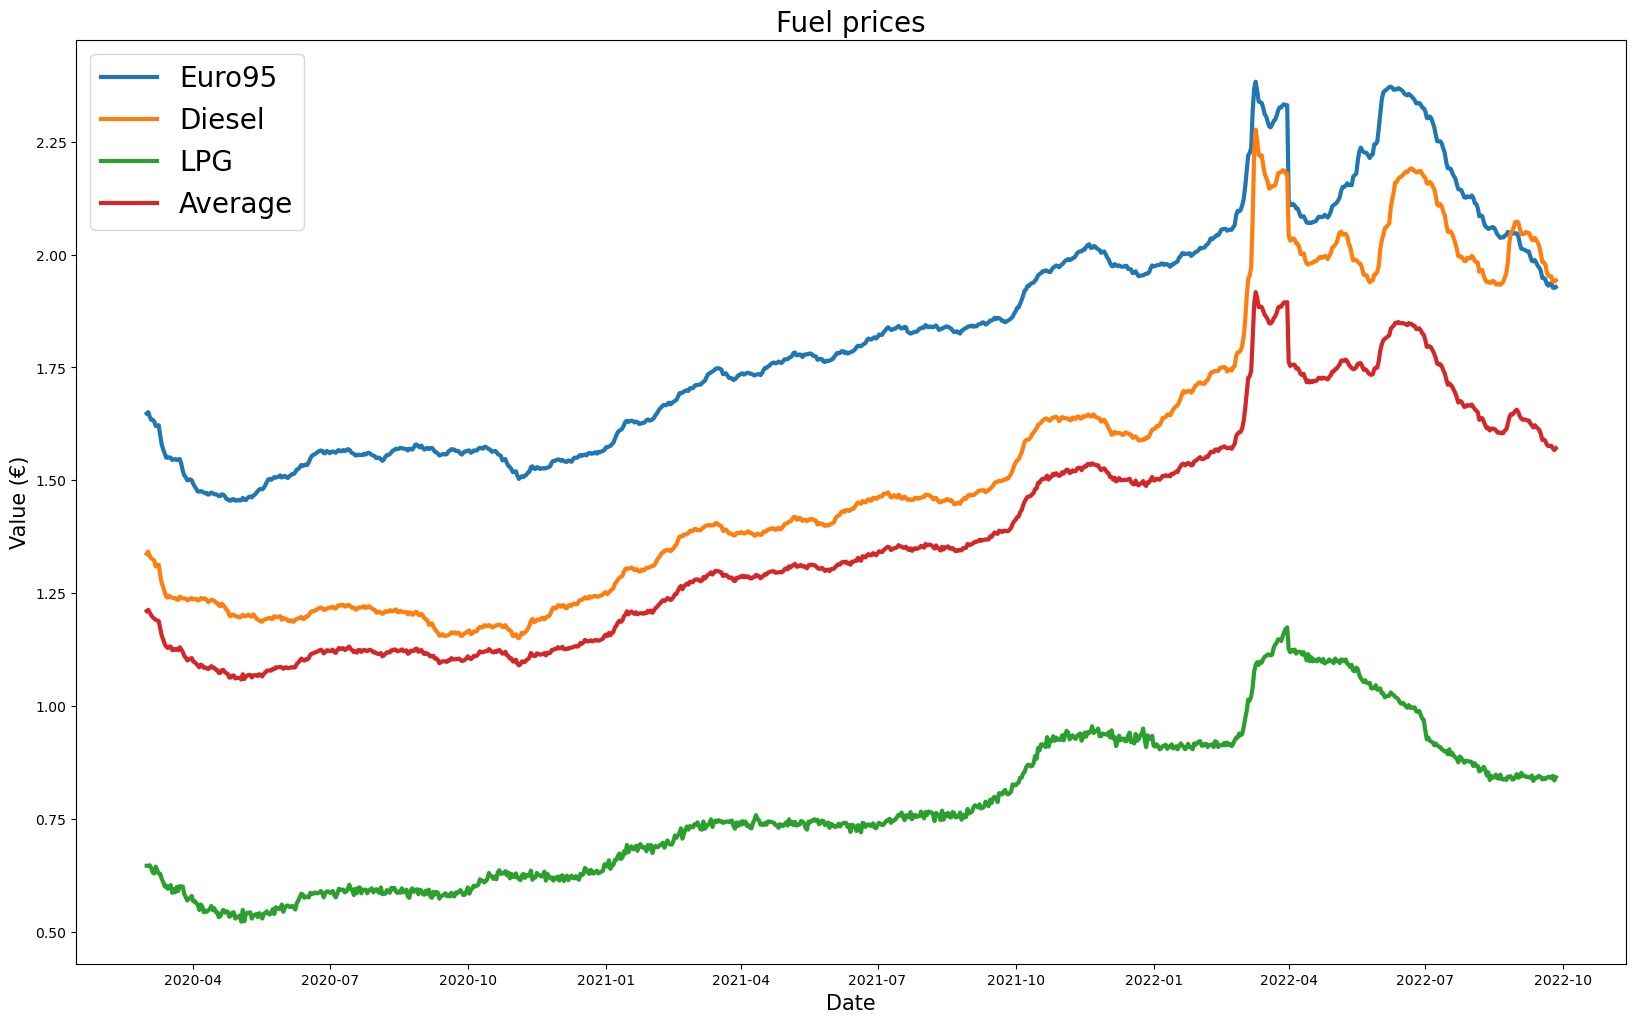

In [5]:
#plot graph of prices through chosen timeline
average = ((pompprijzen_timeline.BenzineEuro95_1 + pompprijzen_timeline.Diesel_2 + pompprijzen_timeline.Lpg_3)/3)
a = [pompprijzen_timeline.BenzineEuro95_1 , pompprijzen_timeline.Diesel_2, pompprijzen_timeline.Lpg_3, average]
plt.figure(figsize=(20,12))
for i in range(len(a)):
    plt.plot(dates_rough, a[i], linewidth = 3)     
plt.title('Fuel prices', fontsize = 20)
plt.ylabel('Value (€)', fontsize = 15)
plt.xlabel('Date', fontsize = 15)
plt.legend(('Euro95', 'Diesel', 'LPG', 'Average'), loc = 'upper left', fontsize = 20)

In [6]:
euro95 = datetime.datetime.strptime(str(pompprijzen_timeline.BenzineEuro95_1.idxmax()), '%Y%m%d')
diesel = datetime.datetime.strptime(str(pompprijzen_timeline.Diesel_2.idxmax()), '%Y%m%d')
lpg = datetime.datetime.strptime(str(pompprijzen_timeline.Lpg_3.idxmax()), '%Y%m%d')

euro95_output = euro95.strftime('%Y/%m/%d')
diesel_output = diesel.strftime('%Y/%m/%d')
lpg_output = lpg.strftime('%Y/%m/%d')

print('The maximum price for Euro95 is: %.2f' % pompprijzen_timeline.BenzineEuro95_1.max()   , ', this price occurred at', euro95_output)
print('The maximum price for Diesel is: %4.2f' % pompprijzen_timeline.Diesel_2.max()    , ', this price occurred at', diesel_output)
print('The maximum price for LPG is   : %4.2f' % pompprijzen_timeline.Lpg_3.max()    , ', this price occurred at', lpg_output)

#wat hierna nog kunnen doen is de grootste stijging van prijs op 1 dag vinden

The maximum price for Euro95 is: 2.38 , this price occurred at 2022/03/10
The maximum price for Diesel is: 2.28 , this price occurred at 2022/03/10
The maximum price for LPG is   : 1.17 , this price occurred at 2022/03/31


# Congestion analysis

In the section data used the data that is used is shown. The data of congestion was available for the whole of the Netherlands over the months. Therefore multiple seperate files were downloaded. In order to perform an analysis it was helpful to combine those .csv files into one file. This is done with the script below.

In [7]:
# script only works if file is opened directly from folder from github
cwd = os.getcwd()
path_name = 'data\congestion_data'
project_map = 'TIL6022---Project'

if cwd[-20:] != path_name:
    os.chdir("data/congestion_data")                          # change working directory to right folder (once)
    print('Working directory changed to: %s' % os.getcwd())
else:
    print('Working directory: %s' % os.getcwd())

Working directory changed to: C:\Users\feron\TIL6022---Project\data\congestion_data


In [8]:
file_extension = '.csv'
all_filenames = [i for i in glob.glob(f"*{file_extension}")]
# use global to find all filenames in the directory with the extension .csv

combined_csv_data = pd.concat([pd.read_csv(f, delimiter=';', parse_dates=[['DatumFileBegin', 'TijdFileBegin']],
                 index_col='DatumFileBegin_TijdFileBegin') for f in all_filenames])
# dataframe is created with all information from the datafiles

In [9]:
cwd = os.getcwd()
if cwd[-5:] != '\data':
    os.chdir('..')
# change working directory to save the new df into a new file in the data folder
# Script only work if the directory is not correct

new_filename = 'data_congestion.csv'
all_filenames = [i for i in glob.glob(f"*{file_extension}")]
if new_filename not in all_filenames:
    combined_csv_data.to_csv('data_congestion.csv')
#Saving our combined csv data as a new file, only if the file has not been saved already

In [12]:
df = pd.read_csv('data_congestion.csv')
#Load the dataframe that has been created by combining the other data downloaded from RWS

#to find the traffic jams around Delft
#KopWegvakVan en KopWegvakNaar is filtered for Delft so that we find all traffic jams around Delft.
df1 = df[(df["KopWegvakVan"].str.contains("Delft") == True) | (df["KopWegvakNaar"].str.contains("Delft") == True)]
df1['FileDuur'] = df1['FileDuur'].str.replace(",", '.').astype(float) #convert string to float for calculation
pd.options.mode.chained_assignment = None # There is no chained assignment

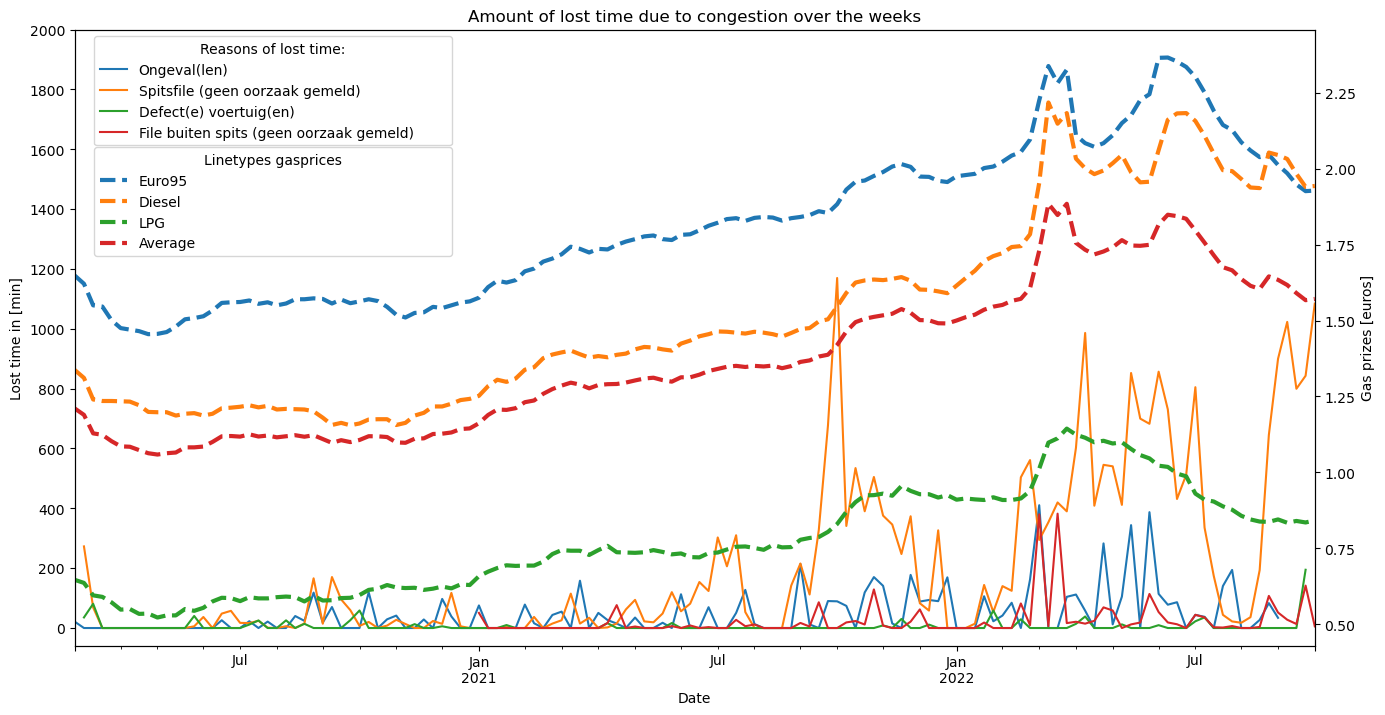

In [13]:
#First we want to know the causes of the traffic jams with their corresponding occurance
from collections import Counter
input =  df1.Oorzaak_1
c = Counter(input)
oorzaken = []
oor_count = []

#now we want to create two list with the occurance and the cause
#We chose to only look at causes that occur more or equal to 25 times, so that only significant causes are shown
for k in c.items():
    if k[1] >= 25:
        oorzaken.append(k[0])
        oor_count.append(k[1])
        
#create names for the dataframes that look like: df_'first3lettersofcause'   
names = []
for i in oorzaken:
    names.append('df_' + i[0:3].lower())

#create figure and axes for the plots
#create dataframes containing a cause each so that they can be plotted
fig, ax = plt.subplots(figsize=(16,8))
for j in range(len(names)):
    names[j] = df1[df1['Oorzaak_1'] == oorzaken[j]]
    names[j].set_index("DatumFileBegin_TijdFileBegin", inplace=True)
    names[j].index = pd.to_datetime(names[j].index)
    names[j] = names[j].resample('W').sum()
    ax = names[j].plot(y='FileDuur', label=oorzaken[j], ax=ax)

##############################################################################################################    
# dit deel zorgt voor de twee y-assen
# dit moet dus verplaatst worden naar het combine gedeelte
labels_ax2 = ['Euro95', 'Diesel', 'LPG', 'Average']
b = 5
ax2 = ax.twinx()
for i in range(len(a)):
    a[i] = a[i].to_frame()
    a[i].index = pd.to_datetime(a[i].index, format='%Y%m%d')
    ax2 = a[i].plot(y=0, label=labels_ax2[i], linewidth=3, style='--' , ax=ax2)
ax2.set_ylabel('Gas prizes [euros]')
ax2.legend(bbox_to_anchor=(0.01, 0.00, 0.30, 0.82), title='Linetypes gasprices', mode='expand')
##############################################################################################################

y_ticks_ax1 = np.linspace(0, 2000, 11)
ax.legend(bbox_to_anchor=(0.01, 0.00, 0.30, 1), title='Reasons of lost time:', mode='expand')
ax.set_yticks(y_ticks_ax1)
ax.set_xlabel('Date')
ax.set_ylabel('Lost time in [min]')
ax.set_title('Amount of lost time due to congestion over the weeks');

# COVID Visualisation 

In this part of the research, we visualise the amount of COVID-infections to find a relation between the congestion over the weeks, since lockdowns likely had an impact on the congestion.

In [ ]:
cwd = os.getcwd()
if cwd[-5:] == '\data':
    os.chdir('covid_data')
else:
    if cwd[-11:] == '\covid_data':
        print('Working folder is already correct')
    else:
        'Something went wrong, manually change the working folder'
        
        
os.getcwd()

In [ ]:
cwd = os.getcwd()
if cwd[-11:] != '\covid_data':
    os.chdir('..')
# change working directory to save the new df into a new file in the data folder
# Script only work if the directory is not correct

new_filename = 'covid_combined.csv'
all_filenames = [i for i in glob.glob(f"*{file_extension}")]
if new_filename not in all_filenames:
    combined_csv_data.to_csv('covid_combined.csv')
#Saving our combined csv data as a new file, only if the file has not been saved already

In [ ]:
df = pd.read_csv('covid_combined.csv')
df.head()

In [ ]:
df_new = df.query("Province == 'Zuid-Holland'")
df_day = df_new.groupby('Date_of_publication').sum()
df_day.head(5)

In [ ]:
fig = px.line(df_day, 
              x=df_day.index, 
              y='Total_reported',
              title='Covid infections in South Holland'
             )
fig.show()

In [ ]:
df_day3 = df_day.drop(index='2022-08-02') #drop this value since it is an inaccurate value
                 
fig = px.line(df_day3, 
              x=df_day3.index, 
              y='Total_reported',
              title='Covid infections in South Holland'
             )
fig.show()

# Combined data

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

BEN = pompprijzen_timeline.BenzineEuro95_1 
DIE = pompprijzen_timeline.Diesel_2
LPG = pompprijzen_timeline.Lpg_3
spitsfile = df1['Oorzaak_1'] == "Spitsfile (geen oorzaak gemeld)"

# Add traces
fig.add_trace(
    go.Scatter(x=dates_rough, y=BEN, name="Petrol"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=dates_rough, y=DIE, name="Diesel"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=dates_rough, y=LPG, name="LPG"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=dates_rough, y=average, name="Average gas price"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=dates_rough, y=spitsfile, name="Fileduur"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Gas prices and traffic"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Price</b> in €", secondary_y=False)
fig.update_yaxes(title_text="<b>Lost time</b> in hours", secondary_y=True)

fig.show()

# Congestion

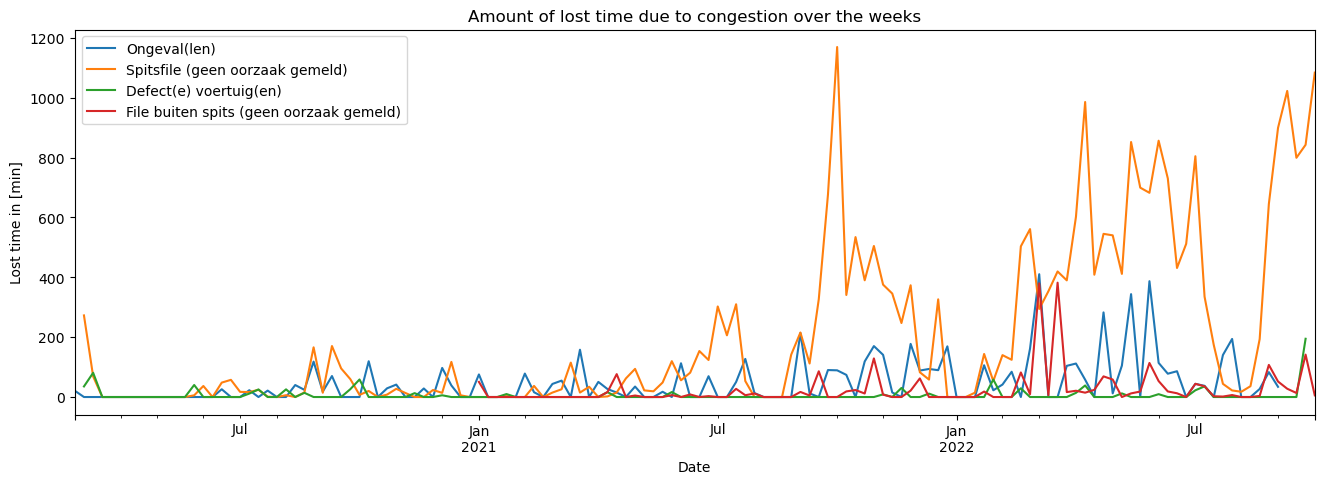

# Fuel prices

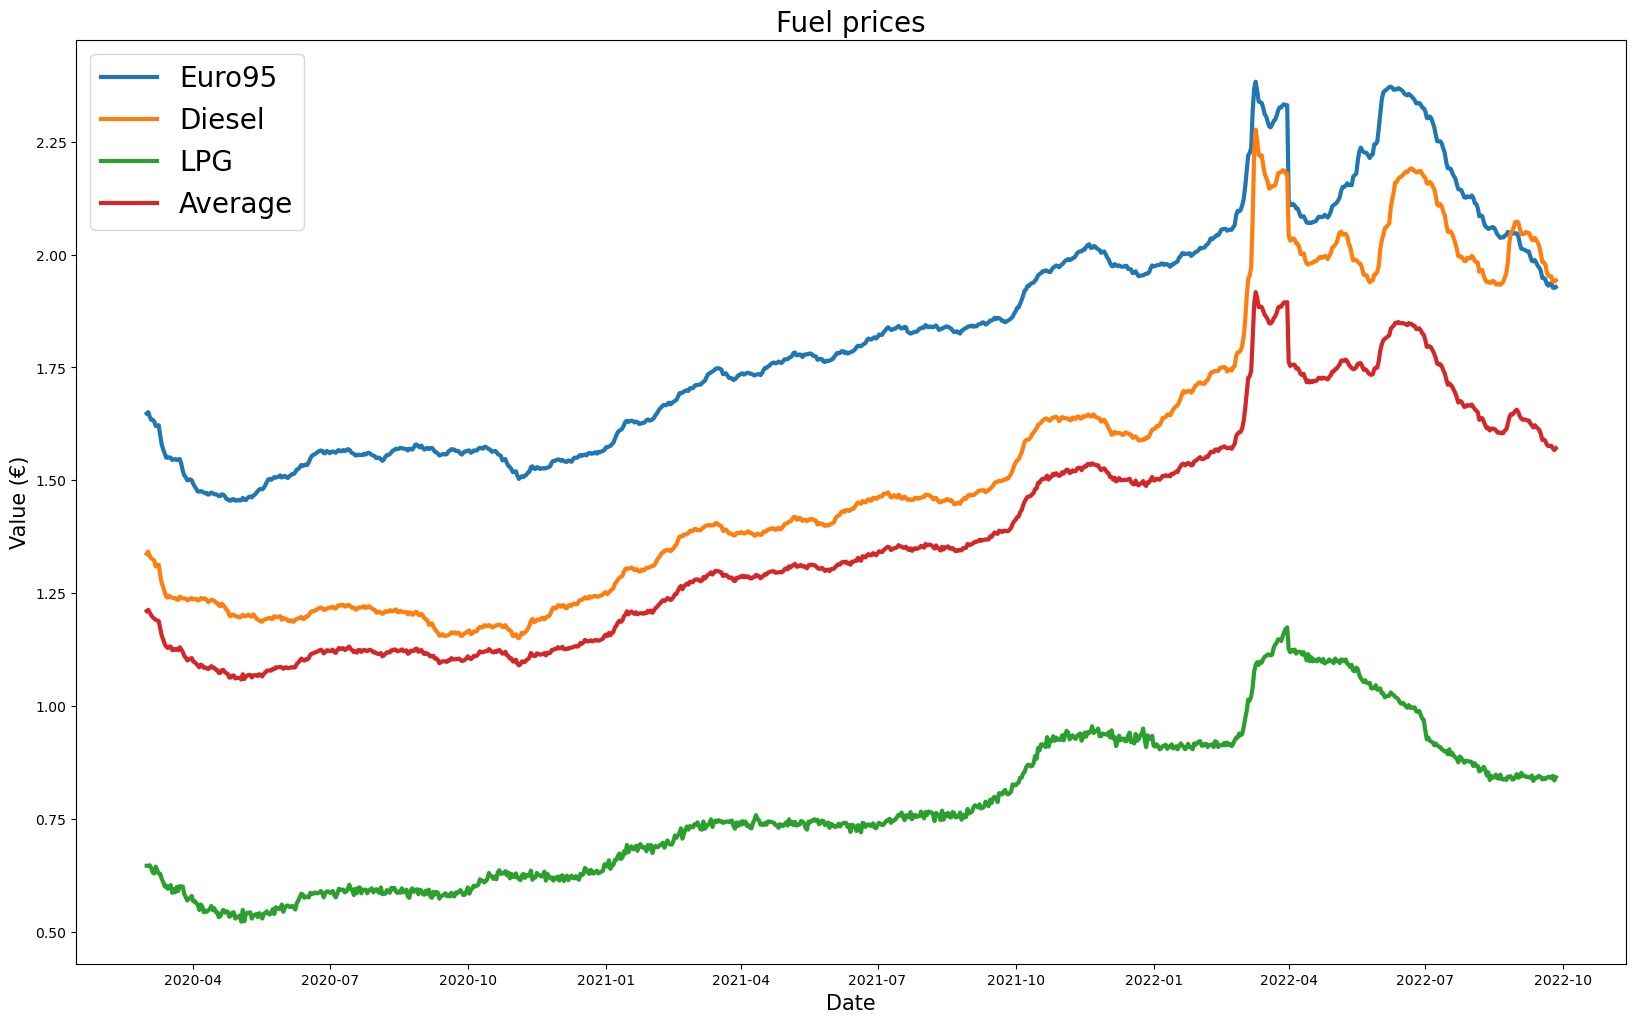

In [ ]:
#DIT IS EEN VOORBEELD VAN HET INTERNET HOE HET OOK KAN, MAAR WE HEBBEN TEVEEL DATUMS DIE DAN NIET NETJES WORDEN GEPLOT
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot

host = host_subplot(111)
par = host.twinx()

host.set_xlabel("Date")
host.set_ylabel("Lost time in [min]")
par.set_ylabel("Price (€)")

p1, = host.plot([1,2,3], [4,8,9], label="Lost time in [min]")
p2, = par.plot([1,2,3], [2, 6, 8], label="Price (€)")

host.legend(labelcolor="linecolor")

host.yaxis.get_label().set_color(p1.get_color())
par.yaxis.get_label().set_color(p2.get_color())

plt.show()